# Agreement of sentiment

Using the IMDB sentiment dataset found here https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

What is the agreement of the dataset around certain words?

In [15]:
import pandas as pd
import spacy
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

nlp = spacy.load('en')

sentiment = pd.read_csv('./imdb_labelled.txt', sep='\t', header=None)

sentiment.columns = ['text', 'sentiment']

sentiment = sentiment.sort_values(by='sentiment', ascending=False)

In [14]:
tf = defaultdict(int)

for i, row in sentiment.iterrows():
    for term in nlp(row['text']):
        tf[term.lemma_] += 1

sorted(tf.items(), key=operator.itemgetter(1), reverse=True)

[('-PRON-', 1024),
 ('.', 907),
 ('be', 847),
 ('the', 847),
 (' ', 752),
 (',', 648),
 ('and', 433),
 ('a', 432),
 ('of', 377),
 ('this', 291),
 ('to', 256),
 (' \t', 252),
 ('\n', 251),
 ('movie', 211),
 ('in', 203),
 ('film', 189),
 ('not', 182),
 ('that', 165),
 ('0', 138),
 ('-', 136),
 ('have', 132),
 ('1', 120),
 ('do', 112),
 ('for', 105),
 ('as', 94),
 ('good', 93),
 ('but', 93),
 ('bad', 92),
 ('with', 90),
 ('!', 82),
 ('one', 80),
 ('see', 78),
 ('on', 76),
 ('"', 74),
 ("'s", 70),
 ('all', 65),
 ('very', 65),
 ('so', 63),
 ('just', 63),
 ('like', 60),
 ('there', 59),
 ('character', 59),
 ('make', 58),
 ('at', 55),
 ('an', 55),
 (')', 52),
 ('about', 50),
 ('by', 49),
 ('time', 48),
 ('(', 48),
 ('watch', 48),
 ('from', 46),
 ('if', 45),
 ('great', 44),
 ('really', 41),
 ('out', 41),
 ('or', 40),
 ('even', 40),
 ('can', 39),
 ('who', 38),
 ('would', 37),
 ('well', 35),
 ('acting', 35),
 ('will', 34),
 ('think', 34),
 ('love', 33),
 ('scene', 33),
 ('most', 32),
 ('how', 32)

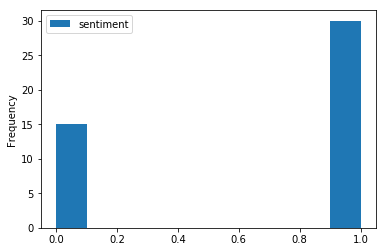

In [22]:
sentiment[sentiment['text'].str.contains('good')].plot.hist()

plt.show()

In [37]:
from scipy.stats import chisquare
import re

for t,v in tf.items():
    if v > 20 and chisquare(sentiment[sentiment['text'].str.contains(re.escape(t))]['sentiment']).pvalue < 0.8:
        print(t)

would
script
bad
plot
 	


waste


/home/hexgnu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/stats/stats.py:4543: RuntimeWarning: Mean of empty slice.
  f_exp = np.atleast_1d(f_obs.mean(axis=axis))


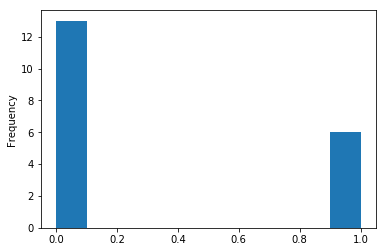

In [39]:
sentiment[sentiment['text'].str.contains('script')]['sentiment'].plot.hist()

plt.show()

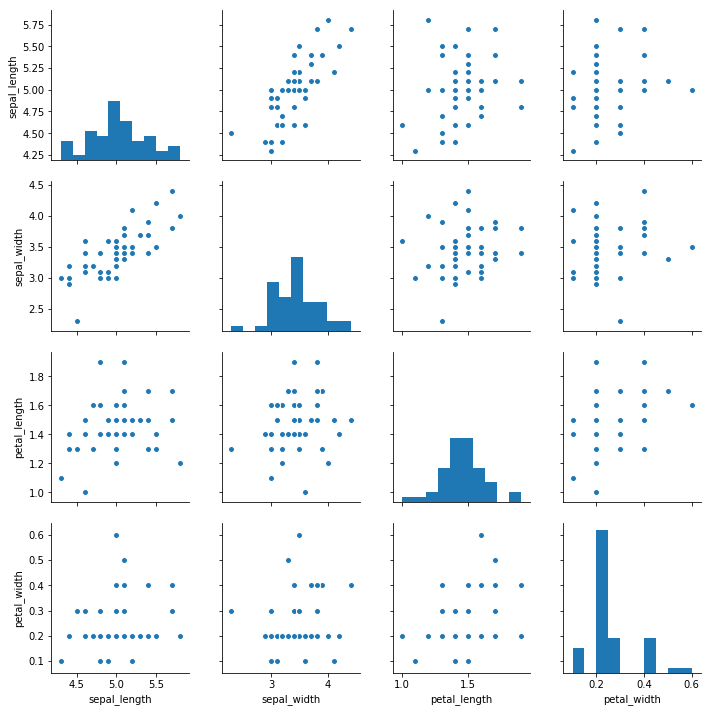

In [44]:
import seaborn as sns

iris = sns.load_dataset('iris')

sns.pairplot(iris[iris['species'] == 'setosa'])

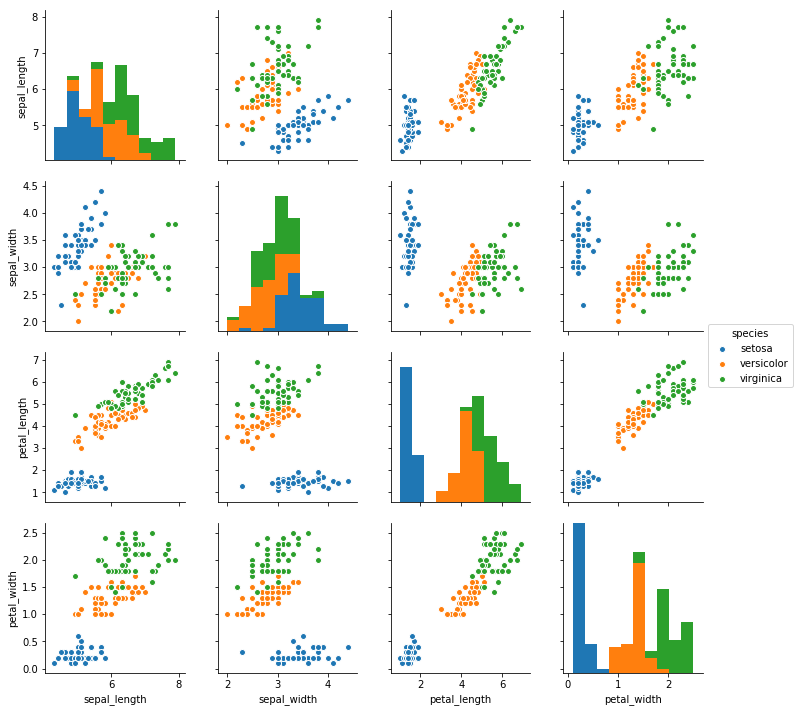

In [46]:
sns.pairplot(iris, hue='species')

# Pandas 101

## First thing is to extract data using either CSV, XLSX, or SQL

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

pd.read_csv('./filename.csv', sep=',', header=None)

df.to_csv('./filename.csv')

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html

pd.read_excel('file.xlsx')
pd.to_excel('dir/myDataFrame.xlsx', sheet_name='Sheet1')

# Read multiple sheets from the same file

xlsx = pd.ExcelFile('file.xls')
df = pd.read_excel(xlsx, 'Sheet1')

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html

from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')
pd.read_sql("SELECT * FROM my_table;", engine)
pd.read_sql_table('my_table', engine)
pd.read_sql_query("SELECT * FROM my_table;", engine)

# Be careful with this one since it will clobber a table. Don't want to just do that ad hoc

pd.to_sql('myDf', engine)

## Transforming data and selecting it

In [47]:
# Note that I have beakerx installed so I can sort these tables. It might look different on your jupyter notebook

iris = sns.load_dataset('iris')

iris

In [49]:
# Select by column

iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

In [50]:
# Or select a set of columns

iris[['species', 'sepal_width']]

In [52]:
# Select by specific value

# Note this can be any boolean value here. Numeric, or even grep
iris[iris['species'] == 'setosa']
iris[iris['sepal_length'] > 4]
iris[iris['species'].str.contains('osa')]

In [53]:
# Sometimes it's really useful to select a specific instance

iris.loc[1]

sepal_length       4.9
sepal_width          3
petal_length       1.4
petal_width        0.2
species         setosa
Name: 1, dtype: object

In [54]:
# Or a specific instance with a specific column

iris.loc[1, 'species']

'setosa'

In [59]:
# You can drop columns

# note that axis = 1 is columns axis=0 is rows. So you can drop a row too

# Note that if you want to actually drop the column for future use you have to reassign it
# iris = iris.drop(['species'], axis=1)

iris.drop(['species'], axis=1)

In [60]:
# sorting is incredibly easy

iris.sort_values(by='sepal_width', ascending=False)

In [62]:
# some info about dataframes

iris.shape # Yields the matrix row and column size
iris.index # Index is basically the row number or hash value
iris.columns # List of columns
iris.info()  # Gives you some information
iris.count() # Non nulls in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [65]:
# Useful statistics

iris.sum() # Sum of values
iris.cumsum() # Cummulative sum of values
# iris.min() / iris.max() # Minimum/maximum values
# iris.idxmin() / iris.idxmax() # Minimum/Maximum index value
iris.describe() # Summary statistics
iris.mean() # Mean of values
iris.median() 

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [68]:
# Applying functions

iris['sepal_width'].apply(lambda x: x ** 2)

# Though you could do this easier with this

iris['sepal_width'] ** 2

# Axis = 1 means by row instead of by column
iris.apply(lambda r: r['sepal_width'] ** 2 + r['sepal_length'], axis=1)

0      17.35
1      13.90
2      14.94
3      14.21
4      17.96
5      20.61
6      16.16
7      16.56
8      12.81
9      14.51
10     19.09
11     16.36
12     13.80
13     13.30
14     21.80
15     25.06
16     20.61
17     17.35
18     20.14
19     19.54
20     16.96
21     18.79
22     17.56
23     15.99
24     16.36
25     14.00
26     16.56
27     17.45
28     16.76
29     14.94
       ...  
120    17.14
121    13.44
122    15.54
123    13.59
124    17.59
125    17.44
126    14.04
127    15.10
128    14.24
129    16.20
130    15.24
131    22.34
132    14.24
133    14.14
134    12.86
135    16.70
136    17.86
137    16.01
138    15.00
139    16.51
140    16.31
141    16.51
142    13.09
143    17.04
144    17.59
145    15.70
146    12.55
147    15.50
148    17.76
149    14.90
Length: 150, dtype: float64

## Pandas also allows you to plot things

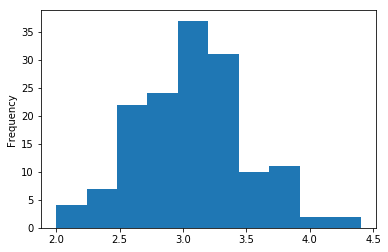

In [69]:
iris['sepal_width'].plot.hist()

plt.show()

In [ ]:
# Though I recommend checking out seaborn for plotting things. It has amazing plotting ability

# Scraping wikipedia

What I did was look at wikipedia for things related to Heteroskedasticity (my favorite word ever).

This is limited by depth of 2. Just because this could run for days or weeks.


In [124]:
import json
import spacy
import numpy as np

nlp = spacy.load('en')

with open('./wikipedia/wikipedia/heteroskedasticity.json') as jfile:
    data = json.load(jfile)
    
index = set([])
X = []
print(len(data))

c = 0

for d in data:
    title = d['title'].replace(' - Wikipedia', '')
    
    c += 1
    
    if not re.match('File:', title) and title not in index:
        index.add(title)
        parsed_text = nlp(d['document'])
        print('.', end='')
        X.append(parsed_text.vector / parsed_text.vector_norm)

332
................................................................................................................................................................................................................................................................................................................................

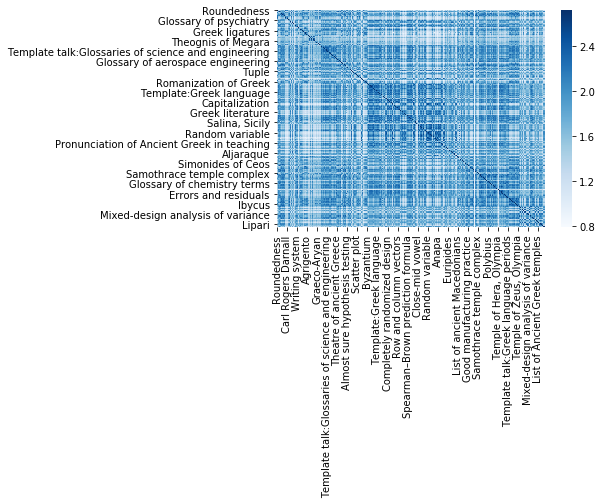

In [128]:
distance = pd.DataFrame(np.matrix([[np.linalg.norm(i-j) for j in X] for i in X]), index=list(index), columns=list(index))

sns.heatmap(np.exp(1-distance), cmap='Blues')

In [131]:
# Vertical transformation what can we throw out?

distance['Heteroscedasticity'].describe()

count    320.000000
mean       0.383825
std        0.161968
min        0.000000
25%        0.265148
50%        0.355036
75%        0.491281
max        1.062809
Name: Heteroscedasticity, dtype: float64

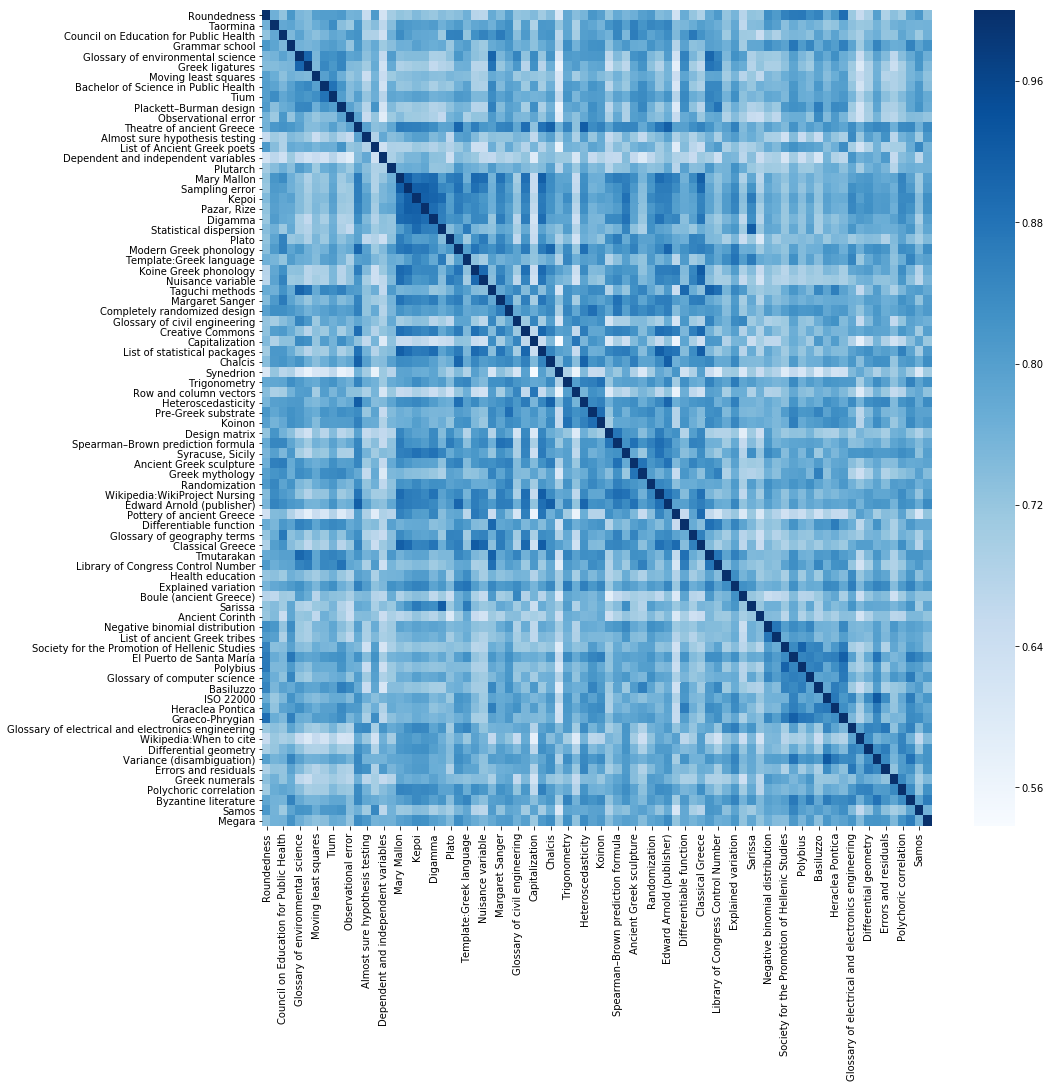

In [145]:
# Windsorizing

# We can basically throw out a bunch of the values that are below a certain value
keep = []
for i in index:
    d = distance.loc[i, 'Heteroscedasticity']
    
    if d < distance['Heteroscedasticity'].describe()['25%']:
        keep.append(i)
        
new_distance = distance[keep].loc[keep]


plt.figure(figsize=(15,15))

sns.heatmap(1-new_distance, cmap='Blues')

In [147]:
new_distance['Heteroscedasticity'].sort_values()

Heteroscedasticity                                    0.000000
Theatre of ancient Greece                             0.080273
Chalcis                                               0.091038
Edward Arnold (publisher)                             0.097334
Modern Greek phonology                                0.114570
Creative Commons                                      0.134197
Explained variation                                   0.142253
Koinon                                                0.142914
Trigonometry                                          0.146024
Completely randomized design                          0.148715
Errors and residuals                                  0.152787
List of statistical packages                          0.153707
Kepoi                                                 0.155938
Wikipedia:WikiProject Nursing                         0.156936
Variance (disambiguation)                             0.157633
Pre-Greek substrate                                   0

# Matrix factorization

We can also manipulate the dataset horizontally using something like PCA. There are many many others (ICA, Random Feature Selection, VIMP, and some manifold stuff).

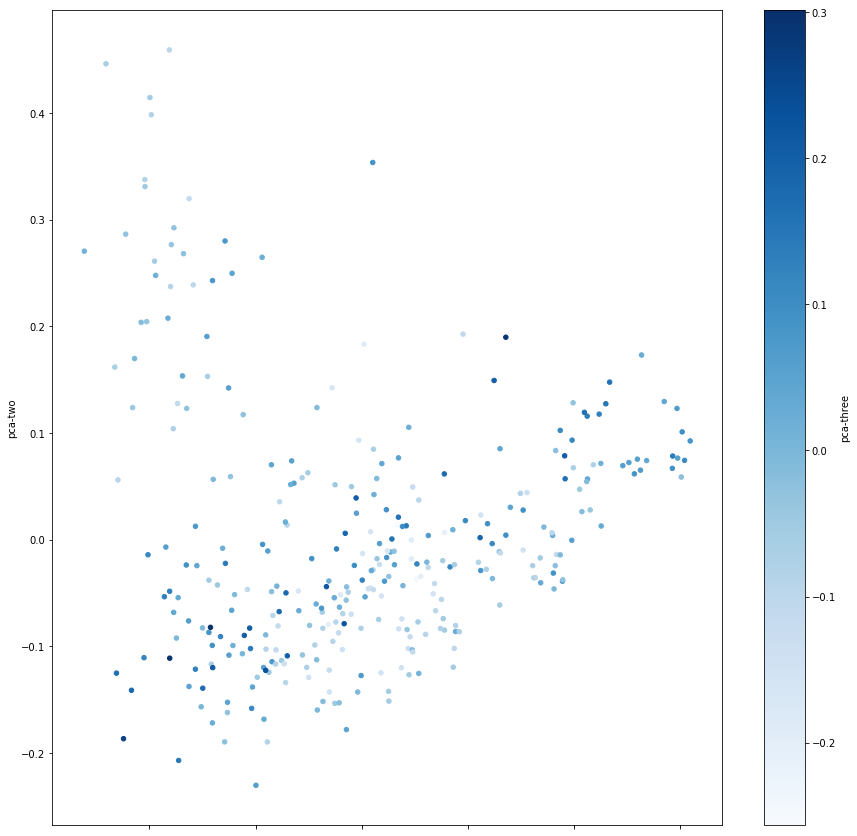

In [159]:
from sklearn.decomposition import PCA
df = pd.DataFrame(X, index=list(index))
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.values)

result = pd.DataFrame(None, index=set(index))
result['pca-one'] = pca_result[:,0]
result['pca-two'] = pca_result[:,1] 
result['pca-three'] = pca_result[:,2]

result.plot.scatter(x='pca-one', y='pca-two', c='pca-three', cmap='Blues', figsize=(15,15))

plt.show()

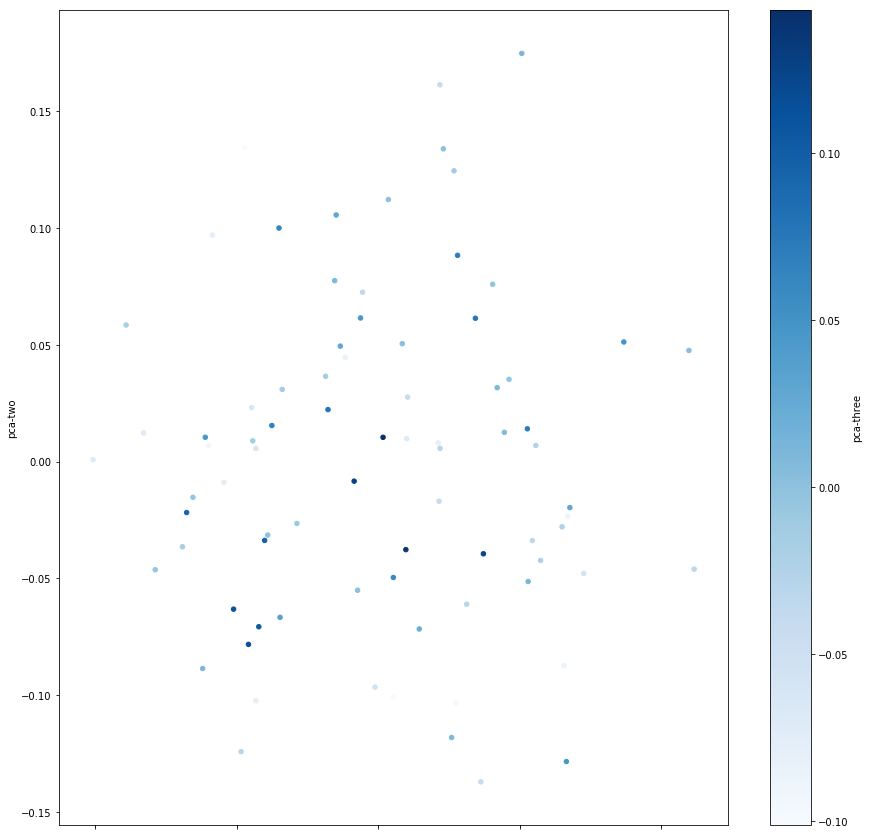

In [162]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df.loc[keep].values)

result = pd.DataFrame(None, index=keep)
result['pca-one'] = pca_result[:,0]
result['pca-two'] = pca_result[:,1] 
result['pca-three'] = pca_result[:,2]

result.plot.scatter(x='pca-one', y='pca-two', c='pca-three', cmap='Blues', figsize=(15,15))

plt.show()

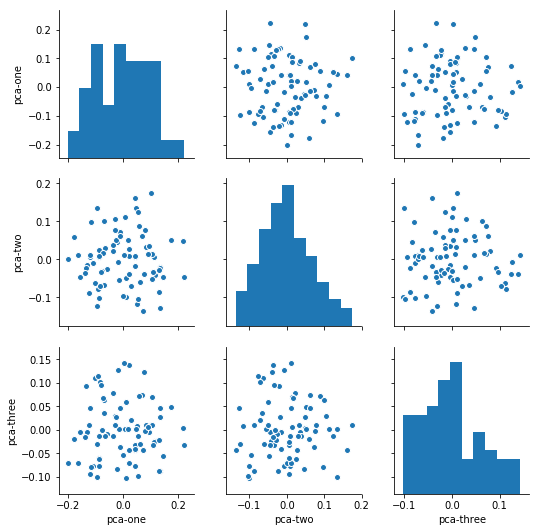

In [163]:
sns.pairplot(result)